# **Projeto Neurotech**

### Questões que serão abordadas neste arquivo:

1) Entendimento da base e análise explanatória dos dados.
2) Pré-processamento das variáveis.
3) Treinamento de um modelo de classificação binária.
4) Análise técnica da performance do modelo.   
5) Análise de negócio, interpretando os números obtidos e indicando como seu modelo de machine learning impactaria positivamente a empresa e seus clientes.

In [40]:
### Import de todas as bibliotecas necessárias

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

### **Questão 1**

Na questão 1, os seguintes pontos serão abordados: 
1. Tamanho da base
2. Eliminação de colunas com pouca informação
3. Análise de colunas com valores NaN
4. Análise dos tipos de colunas do DataFrame
5. Distribuição dos alvos

In [2]:
# Função genérica desenvolvida para plotar gráficos de barras. 
def plot_barchart(data, parameter, x_label):
    plt.figure(figsize=(8, 6))
    sns.barplot(x= data[parameter], y= data['count'], palette='viridis', hue= data[parameter], legend= False)
    plt.xlabel(x_label)
    plt.ylabel('Count')
    plt.title(f'Contagem de {x_label} diferentes')
    plt.show()

In [3]:
# A base foi extraída através da função pd.read_csv() e estava espaçada por \t.
df = pd.read_csv('dataset/base_case.csv', sep= '\t').drop(['index', 'PRODUTO'], axis= 1)

df.head()

,alvo,REF_DATE,DIAS_ATRASO,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200,REGIAO
0,0,2023-01-31,52,2461.11,30 a 60,0,0,0,0,0,...,0,2,NaN,MEDIO,NaN,3.0,-1.0,1.0,URBANO,NORTE
1,0,2022-12-29,37,4674.50,30 a 60,0,0,0,0,0,...,0,4,D,MEDIO,D,2.0,1.0,1.0,URBANO,NORDESTE
2,0,2023-09-29,36,43649.17,30 a 60,1,0,0,0,0,...,0,8,B,MUITO ALTO,B+,4.0,3.0,1.0,URBANO,SUDESTE
3,1,2023-02-28,48,1090.58,30 a 60,0,0,0,0,0,...,0,1,C,BAIXO,C-,4.0,-4.0,0.0,URBANO,SUDESTE
4,0,2023-02-28,34,1495.49,30 a 60,0,0,0,0,0,...,0,3,C,MEDIO,C,4.0,-1.0,1.0,URBANO,SUDESTE


##### Tamanho da base. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46522 entries, 0 to 46521
Columns: 201 entries, alvo to REGIAO
dtypes: float64(52), int64(102), object(47)
memory usage: 71.3+ MB


In [5]:
df.describe()

,alvo,DIAS_ATRASO,col_4,col_6,col_7,col_8,col_9,col_10,col_11,col_12,...,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_197,col_198,col_199
count,46522.000000,46522.000000,46522.000000,46522.000000,46522.000000,46522.0,46522.000000,46522.000000,46522.000000,46522.0,...,46522.000000,46522.000000,46522.000000,46522.000000,46522.000000,46522.000000,46522.000000,42393.000000,42374.000000,43038.000000
mean,0.128541,45.232664,5705.319267,0.272538,0.003074,0.0,0.000150,0.017991,0.142427,0.0,...,0.407506,0.088582,0.038240,0.192576,0.000172,0.002601,2.430356,2.943552,-0.799948,0.688183
std,0.334695,8.358060,14505.087222,0.621192,0.056129,0.0,0.012266,0.132922,0.600622,0.0,...,0.491376,0.284142,0.191777,0.394327,0.013112,0.050933,2.109616,1.122959,1.885828,0.463241
min,0.000000,31.000000,0.760000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,0.000000
25%,0.000000,38.000000,812.957500,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,-2.000000,0.000000
50%,0.000000,46.000000,1823.965000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,-1.000000,1.000000
75%,0.000000,52.000000,4279.897500,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000,1.000000
max,1.000000,60.000000,294608.140000,8.000000,2.000000,0.0,1.000000,1.000000,5.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,11.000000,7.000000,1.000000


#### Eliminação de colunas com pouca informação 

Algunas das colunas da base trazem pouquíssima informação relevante.
65 colunas possuem sua média menor que 0.05, ao análisar uma delas no gráfico abaixo, é possível concluir que nenhuma informação relevante poderá ser extraída dela. Por esse motivo, todas essas colunas serão descartadas. 


Um total de 65 colunas tem média menor que 0.05
col_7
0    46381
1      139
2        2
Name: count, dtype: int64


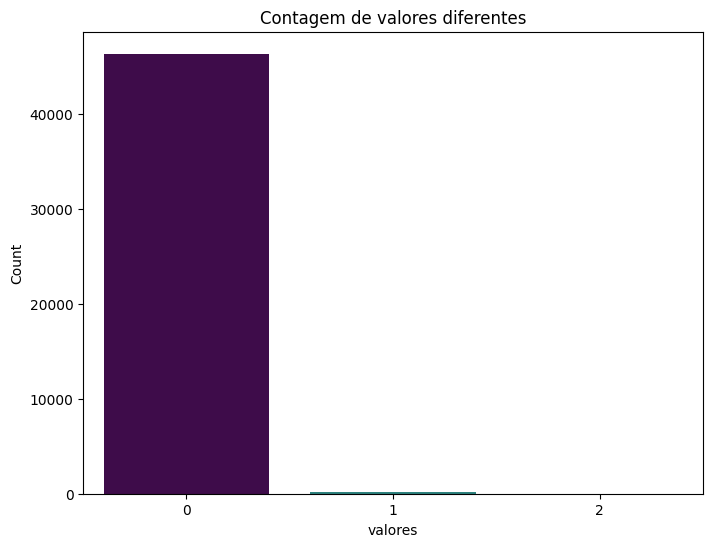

In [6]:
df_not_obj = df.select_dtypes(include=['int', 'float'])

df_zero_mean = df_not_obj.loc[:, (df_not_obj.mean() < 0.05) & (df_not_obj.mean() > -0.05)]

print(f"Um total de {len(df_zero_mean.columns)} colunas tem média menor que 0.05")

print(df_zero_mean['col_7'].value_counts())
plot_barchart(df_zero_mean['col_7'].value_counts().reset_index(), 'col_7', 'valores')

df = df.drop(df_zero_mean.columns, axis = 1, errors= 'ignore')


#### Análise de colunas com valores NaN. 

A base de dados avaliada possui dados faltantes em 72 das suas 136 colunas restantes. 

Esse problema é muito comum, visto que podem haver desleixos durante o processo de preenchimento. 
Existem diversas maneiras de preencher os dados faltantes em uma base de dados, entretanto esses pontos serão abordados na questão 2, já que esta é somente uma etapa de visualização. 

Abaixo, tem-se um gráfico em barra mostrando a distribuição de dados faltantes. 

     group  count
0      Tem     72
1  Não tem     64


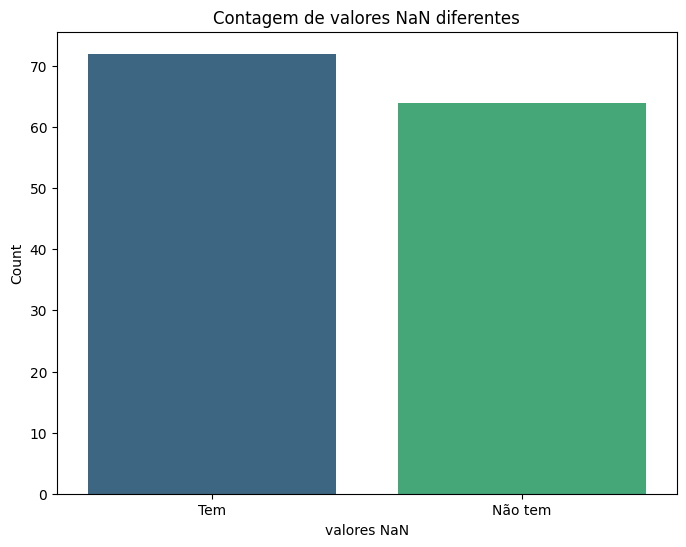

In [7]:
def categorize_na_count(count):
    if count == 0:
        return 'Não tem'
    else: 
        return 'Tem'

na_counts = df.isna().sum()
na_counts = na_counts.reset_index()
na_counts.columns = ['col_name', 'nan_count']

na_counts['group'] = na_counts['nan_count'].apply(categorize_na_count)

na_counts = na_counts['group'].value_counts().reset_index()
print(na_counts)
plot_barchart(na_counts, 'group', 'valores NaN')

##### Análise dos tipos das colunas do DataFrame. 

A base em questão possui tipos de valores mistos, podendo ser strings ou numerais. 

Durante a etapa de pré-processamente várias medidas serão tomadas para deixar a base no melhor formato possível para servir de input ao modelo. Entretanto as médidas devem considerar os tipos de dados de cada coluna, por esse motivo, é importante que se entenda os tipos de todas as colunas restantes à base. 

Essa análise está sendo executada na próxima célula, onde está em amostra o gráfico dos tipos de colunas. 

  col_type  count
0   object     47
1    int64     44
2  float64     44


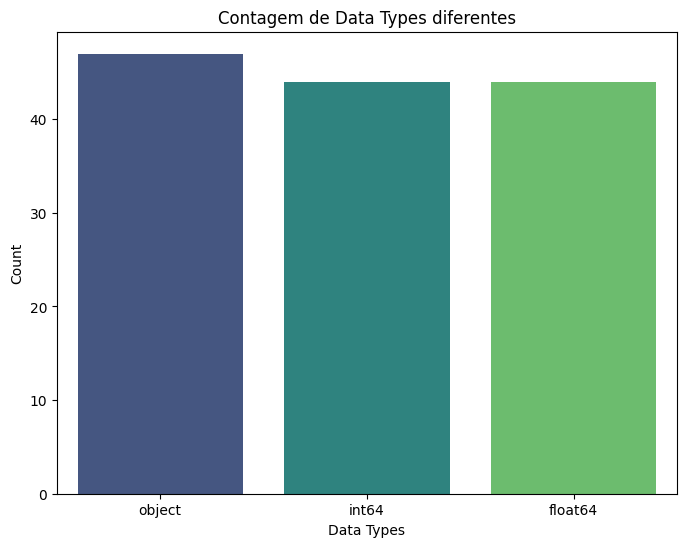

In [8]:
column_types = pd.DataFrame([[column, df[column].dtype] for column in df.columns], columns= ['col_name', 'col_type']).drop(0)
dtype_counts = column_types['col_type'].value_counts().reset_index()

print(dtype_counts)
plot_barchart(dtype_counts, 'col_type', 'Data Types')


#### Distribuição dos alvos. 

Conforme o gráfico apresentado, pode-se concluir que a base está desbalanceada no que se refere à colunas `alvo`. Dessa forma, algumas medidas deverão ser tomadas na fase de pré-processamento dos dados. 


   alvo  count
0     0  40542
1     1   5980


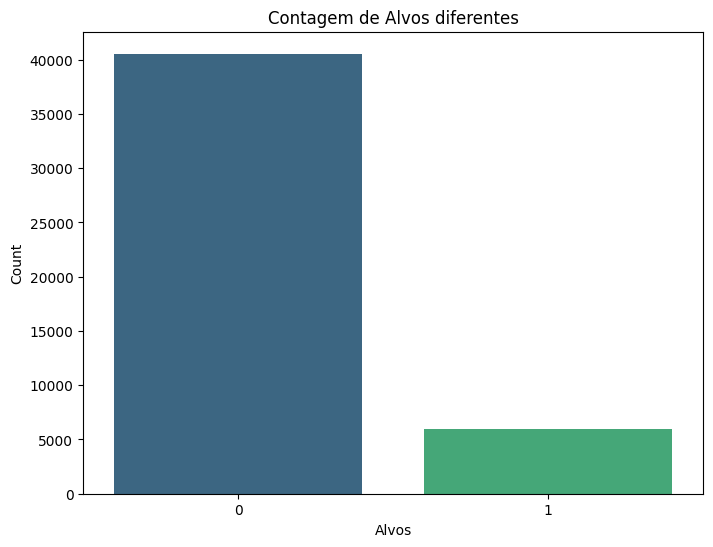

In [9]:
print(df['alvo'].value_counts().reset_index())
plot_barchart(df['alvo'].value_counts().reset_index(), 'alvo', 'Alvos')

### Questão 2

Na questão 2, os seguintes pontos serão abordados: 
1. Codificação das colunas do tipo objeto (strings).
2. Normalização da base. 
3. Distribuição das features.
4. Tratativa para o balanceamento da base. 

##### Codificação das colunas do tipo objeto (strings).

Como visto anteriormente, 47 colunas possuem string em seus valores. Neste caso, torna-se necessário codificar as strings em números inteiros, para que o modelo seja capaz de avaliar essas colunas. 

Dentre essas, algumas colunas possuem valores NaN, para este casos a string atribuída será "Desconhecido". No momento de codificação esses valores também receberão um valor inteiro e serão avaliados pelo modelo. 

In [10]:
label = LabelEncoder()

obj_columns = column_types[column_types['col_type'] == 'object']['col_name']

# Existem 
df[obj_columns] = df[obj_columns].fillna('Desconhecido')

df[obj_columns] = df[obj_columns].apply(label.fit_transform)


In [11]:
# Remoção das colunas que não trazem muita informação.
df_zero_mean_encoded = df.loc[:, (df.mean() < 0.05) & (df.mean() > -0.05)]

df = df.drop(df_zero_mean_encoded.columns, axis= 1, errors= 'ignore')

#### Normalização da base. 

Uma etapa importante do pré-processamento é a normalização dos dados, ela se mostra necessária para balancear a base de input. O ideal é que o range de valores entre todas as colunas sejam próximos, para que não haja uma coluna que influencie mais o modelo que outra somente por conta de seus valores médios. 

No contexto do estudo em questão, ao comparar as bases `DIAS_ATRASO` e `col_4`, observa-se que elas têm médias e desvios padrão muito diferentes. Isso pode fazer com que ajustes nos parâmetros sejam mais sensíveis para valores maiores. Portanto, a normalização será aplicada para eliminar essa discrepância e garantir que todas as variáveis contribuam de maneira equilibrada para o modelo.

Nenhuma coluna com válores máximos abaixo de 15 passaram pelo scaler, isto foi feito porque essas colunas são majoritariamente do tipo categóricas, então não precisam passar por esse processo. 

Quanto aos valores NaN ainda encontrados na base, estes foram preenchidos com as médias de suas respectivas colunas.

In [12]:
scaler = StandardScaler()

# Nesses caso os valores NaN foram substituidos pela média de sua respectiva coluna.
df = df.fillna(df.mean())

scale_columns = df.columns[df.max() > 15]


df[scale_columns] = scaler.fit_transform(df[scale_columns])


In [13]:
# Separação da base em input e output
X = np.array(df.iloc[:,1:]).copy()  
y = np.array(df.iloc[:, 0]).copy()


#### Distribuição das features.

A imagem à seguir mostra a distribuição das features para cada um dos alvos. 

Pode-se observar o desbalanceamento da base a partir da diferença das distribuições para essas duas features. 

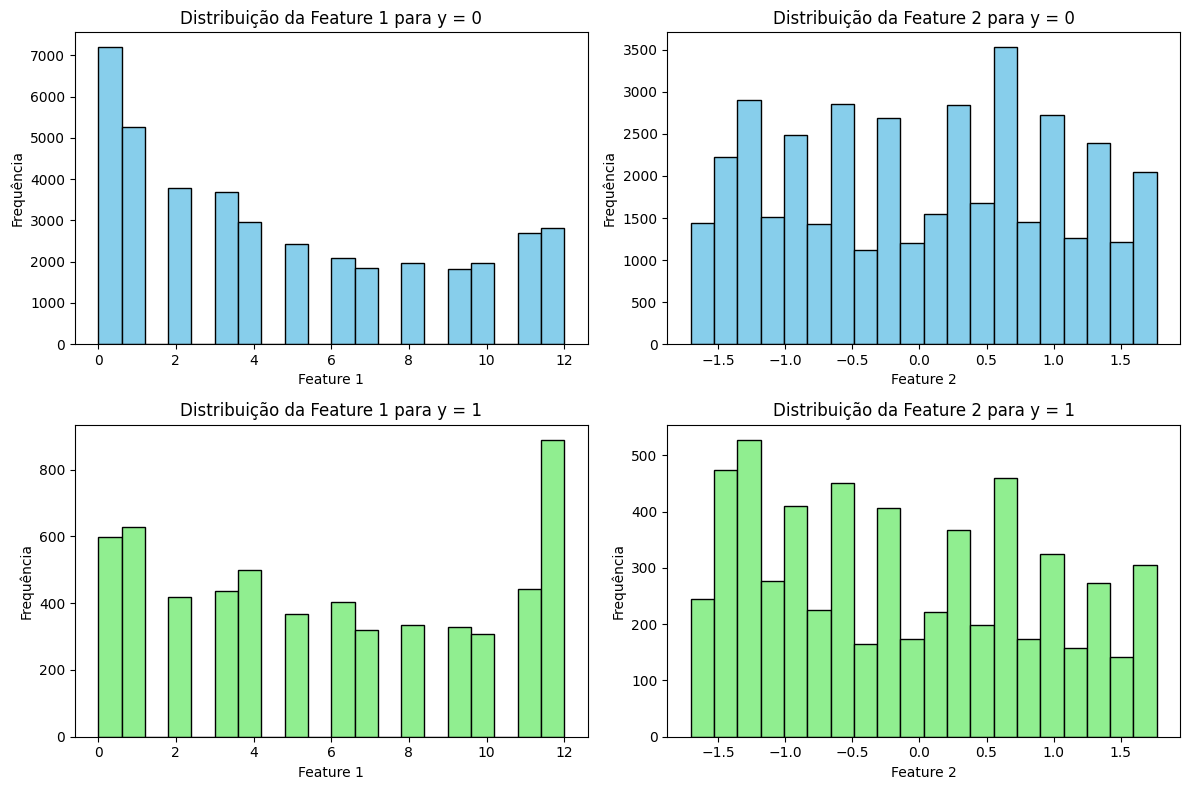

In [31]:
X_0 = X[y == 0]
X_1 = X[y == 1]

plt.figure(figsize=(12, 8))
for i in range(2):
    plt.subplot(2, 2, i+1)
    plt.hist(X_0[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribuição da Feature {i+1} para y = 0')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Frequência')

for i in range(2):
    plt.subplot(2, 2, i+3)
    plt.hist(X_1[:, i], bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Distribuição da Feature {i+1} para y = 1')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

#### Tratativa para o balanceamento da base. 

Conforme foi mostrado anteriormente, a distribuição de alvos está desbalanceada, numa proporção de aproximadamente 7:1. Existem algumas formas de combater o problema de uma base desbalanceada:

* Undersampling -> Este método mexe diretamente na base majoritária, diminuindo sua quantidade para ficar aproximadamente equilibrada com a base minoritária.
    * Vantagem: Somente dados reais são utilizados na hora do treinamento. 
    * Desvantagem: Os dados são descartados e portanto não são utilizados, desperdiçando assim uma considerável parte da base.
* Oversampling -> Este foi o método mexe com a base minoritária, aumentando sua quantidade para que se assemelhe com a base majoritária. Este aumento pode ser feito através da duplicação dos dados ou da geração de dados artificiais (SMOTE).
    * Vantagem: Nenhum dados é desperdiçado, fazendo com que o modelo tenha um treinamento mais extenso. 
    * Desvantagem: Aumenta a probabilidade de overfitting, ao invés de generalizar, o modelo aprendeu apenas a resolver a base de treinamento. 

Existe sempre um trade off para as escolhas em uma análise de um modelo, neste caso, optei por aplicar o Oversampling, através do `SMOTE`.

In [14]:
sm = SMOTE(random_state= 42)

# Aumento da base de dados com amostras sintéticas criadas a partir das reais.
X_res, y_res = sm.fit_resample(X, y)

Após a aplicação da técnica de oversampling, é possível observar a partir da figura à seguir que a quantidade de amostras está mais balanceada e as distribuições para as duas primeira features.

Novos valores apareceram após o `SMOTE`, entretanto esse é o preço a se pagar para melhorar a performance do modelo (There is no free lunch). 

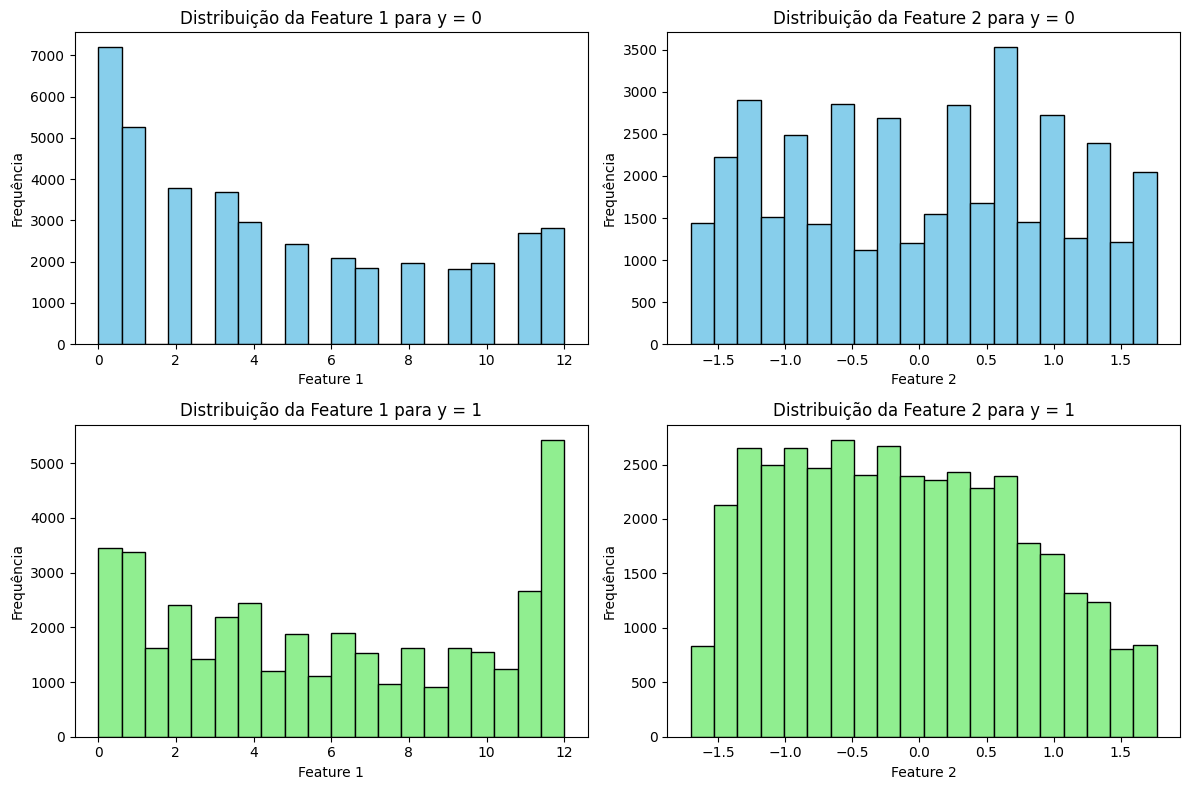

In [30]:
X_0 = X_res[y_res == 0]
X_1 = X_res[y_res == 1]

plt.figure(figsize=(12, 8))
for i in range(2):
    plt.subplot(2, 2, i+1)
    plt.hist(X_0[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribuição da Feature {i+1} para y = 0')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Frequência')

for i in range(2):
    plt.subplot(2, 2, i+3)
    plt.hist(X_1[:, i], bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Distribuição da Feature {i+1} para y = 1')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### Questão 3

Na questão 3, os seguintes pontos serão abordados: 
1. Separação dos dados em três bases.
2. Classificadores. 
3. Gráfico de Box-plot.
4. Grid Search e Validação Cruzada.

#### Separação dos dados em três bases: 
* Treinamento: Dados utilizados para treinar o modelo.
* Validação: Dados utilizados para previnir que o modelo não estão entrando em underfitting ou overfitting.
* Teste: Dados que não foram vistos pelo modelo e serão utilizados para avaliar sua performance. 

In [15]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_res, y_res, test_size= 0.2, random_state= 42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.175, random_state= 42)

In [16]:
kf = StratifiedKFold(n_splits= 4, shuffle= True, random_state= 42)
f1_scorer = make_scorer(f1_score, average='weighted')

#### Classificadores.

Para uma primeira fase, alguns classificadores serão comparados entre si (com todos os parâmetros default). Os melhores resultados dessa comparação serão analisados mais detalhadamente.
1. Multi-layer Perceptron (MLP)
    * MLP é um tipo de rede neural artificial que utiliza camadas de nodos. Em sua arquitetura mais simples, ela possui 3 camadas: entrada; escondida; saída. 
    * Cada nodo de uma camada é conectado a todos os nodos das camadas vizinhas. 
    * Cada nodo utiliza uma função de ativação não linear e sua entrada é a combinação linear dos pesos com os valores de saída dos nodos anteriores, mais um parâmetro chamado de bias. 
    * Os pesos são ajustados e "aprendidos" na fase de treinamento através de um algoritmo de otimização. 

2. Regressão Logistica (RL)
    * Método de classificação que utiliza a função sigmoide. 
    * O argumento da exponencial é a combinação linear entre as features e os pesos. 
    * Método de classificação binária. 
3. KNN
    * Método do tipo lazy learning, a base de treino é utilizado somente como referência para as amostras.
    * Calcula-se a diferença entre features de uma amostra não rotulada e as features das K amostras mais próximas. 
    * O cálculo das e o valor K são hiperparâmetros.  
4. Random Forest (RF)
    * Algoritmo do tipo ensemble, utilizada um conjunto de árvores de decisão. 
    * As árvores calculam possuem nodos com indivíduos e podem ser divididas em dois novos nodos dependendo da entropia.
    * A combinação dos resultados das árvores servirá como output da RF.   

In [17]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('MLP', MLPClassifier()))

results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X_train_val, y_train_val, scoring= f1_scorer, cv= kf)
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} (std: {cv_results.std()})')

LR: 0.5895582060025992 (std: 0.0019355999544003665)
KNN: 0.7265500122017938 (std: 0.002133540469814703)
RF: 0.9316229663163237 (std: 0.0010065216564340504)
MLP: 0.8240546942836298 (std: 0.006965727535699018)


#### Gráfico de Box-plot.

O box-plot, também conhecido como diagrama de caixa, é uma ferramenta gráfica usada para descrever a distribuição de um conjunto de dados numéricos. Ele exibe visualmente a mediana, quartis, e possíveis valores atípicos. A "caixa" central representa o intervalo interquartil (IQR), que abrange do primeiro quartil (Q1) ao terceiro quartil (Q3), enquanto a linha dentro da caixa indica a mediana.

Dessa forma, pode-se concluir que o Random Forest obteve um resultado superior aos outros modelos. 

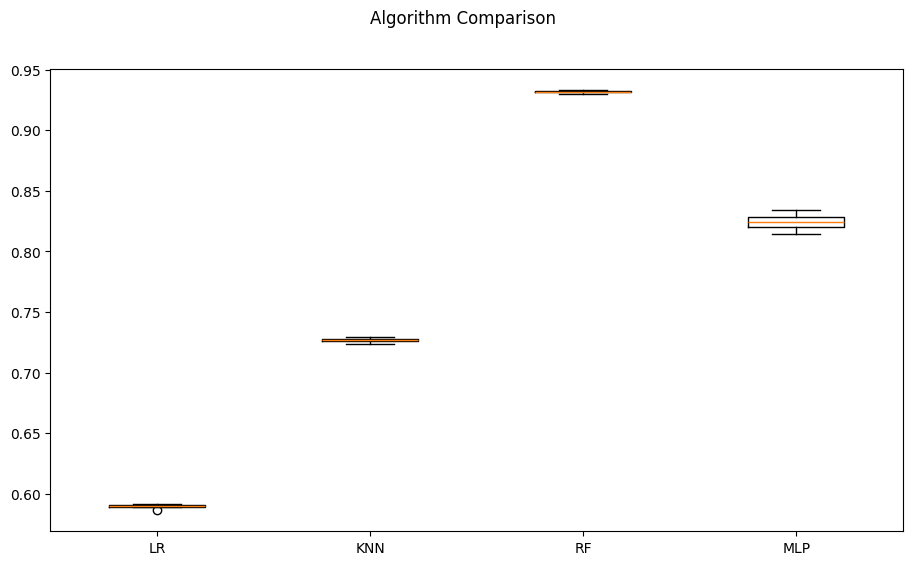

In [18]:
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Grid Search e Validação Cruzada

Para evitar principalmente o overfitting, consequência do oversampling, uma validação cruzada será executada. Na validação cruzada, a base de treino + validação é dividida em k partes e (k-1) partes serão utilizadas para treinar e uma parte será utilizada para avaliar esse treinamento. O processo ocorre k vezes, conforme pode ser visto na matriz abaixo. A partir disso, tem-se a métrica de cada um dos casos e espera-se que eles tenham valores aproximados. 

| Fold | D1      | D2      | D3      | D4      | D5      |
|------|---------|---------|---------|---------|---------|
| 1    | Validação | Treino   | Treino   | Treino   | Treino   |
| 2    | Treino   | Validação | Treino   | Treino   | Treino   |
| 3    | Treino   | Treino   | Validação | Treino   | Treino   |
| 4    | Treino   | Treino   | Treino   | Validação | Treino   |
| 5    | Treino   | Treino   | Treino   | Treino   | Validação |


A validação cruzada será aplicada através do `GridSearchCV`, neste caso um dicionário com hiperparâmetros será enviado. Também será aplicada uma validação cruzada para k= 4, o modelo com a maior média das métricas (f1-score) será escolhido e utilizado na base de teste. 

O hiperparâmetros são dados que não são aprendidos pelo modelo ao longo de treinamento, eles escolhidos pela pessoa que está desenvolvendo o modelo. Por isso o Grid Search é tão importante, para decidir quais são os melhores hiperparâmetros através de várias tentativas. 

In [19]:
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=f1_scorer, cv=kf, n_jobs=-1)


In [20]:
grid_search.fit(X_train_val, y_train_val)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Best F1 score
best_score = grid_search.best_score_
print("Best F1 Score:", best_score)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.9318831313751488


In [21]:
# Seleção do melhor modelo
best_model = grid_search.best_estimator_

In [22]:
# Pevisão a partir de novos dados
y_pred = best_model.predict(X_test)

### Questão 4

Na questão 4, os seguintes pontos serão abordados: 
1. Apresentação das métricas.
2. Análise da matriz de confusão. 
3. Métricas.

#### Apresentação das métricas

A acurácia não é uma métrica de avaliação muito robusta, visto que ela só mede acertos. Por esse motivo, também utilizaremos outras métricas como precisão, recall, f1-score e matriz de confusão. A seguir, tem-se os dados de uma matriz de confusão e as fórmulas para cálculo das métricas utilizadas. 



|             | Previsão: Sim         | Previsão: Não         |
|:-----------:|:---------------------:|:---------------------:|
| **Real: Sim**   | Verdadeiro Positivo (VP) | Falso Negativo (FN)   |
| **Real: Não**   | Falso Positivo (FP)   | Verdadeiro Negativo (VN) | 




$$Acurácia = \frac{VP + VN}{VP + FP + VN + FN}$$

$$Precisão = \frac{VP}{VP + FP}$$

$$Recall = \frac{VP}{VP + FN}$$

$$ F1 Score = \frac{2 * Recall * Precisão}{Recall + Precisão}$$

In [23]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

#### Análise da matriz de confusão

Em mais da maioria dos casos, o modelo acertou os casos reais, além de obter mais que o dobro de falsos positivos sobre falsos negativos. 

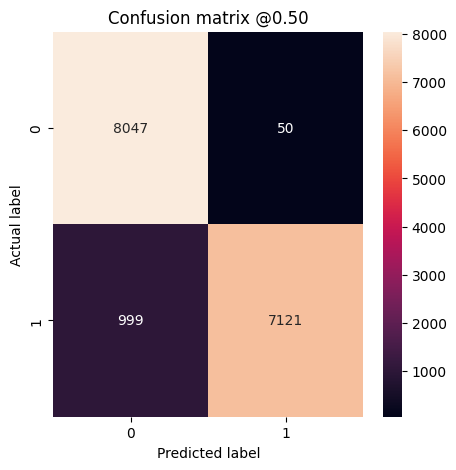

In [24]:
plot_cm(y_test, y_pred)

#### Métricas

Das métricas utilizadas a seguir, a que será utilizada como base para uma análise do impacto do modelo treinado é o f1-score. Isso ocorre porque o F1-score é a média ponderada entre a precisão e o recall, dessa forma erros de Falsos Negativos e Falsos Positivos tem mais impacto como um todo através desta métrica. 

In [25]:
print(f'O recall do modelo foi de: {recall_score(y_test, y_pred):.3f}')

O recall do modelo foi de: 0.877


In [35]:
print(f'A precisão do modelo foi de: {precision_score(y_test, y_pred):.3f}')

A precisão do modelo foi de: 0.993


In [42]:
f1_score_ = f1_score(y_test, y_pred)

print(f'O F1-score do modelo foi de: {f1_score_:.3f}')

O F1-score do modelo foi de: 0.931


### Questão 5

Na questão 5, o impacto deste modelo no négocio será avaliado e projetado. 

Após a aplicação de técnicas de pré-processamento e validação dos dados, o modelo alcançou valores acima de 85% para todas as métricas utilizadas, demonstrando uma capacidade significativa de distinguir clientes para recuperação de crédito, com uma precisão muito superior ao acaso.

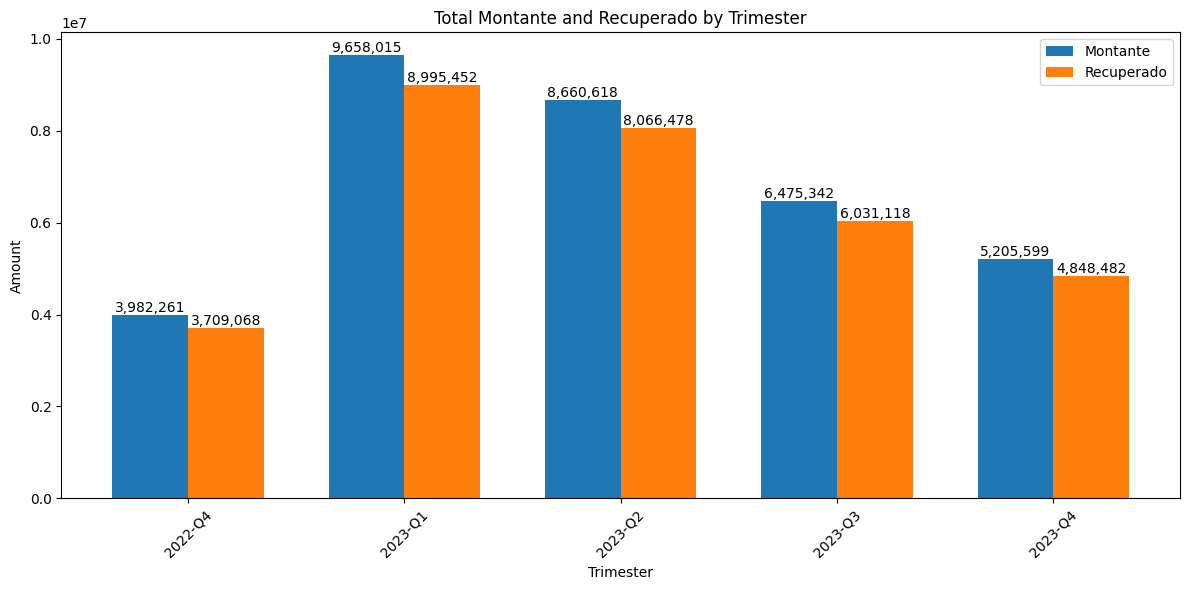

In [28]:
df_avaliacao = pd.read_csv('dataset/base_case.csv', sep= '\t', usecols= [1, 2, 3, 4, 5])

alvos_df = df_avaliacao[df_avaliacao['alvo'] == 1].copy()

grouped_df = alvos_df.groupby('REF_DATE')['col_4'].sum().reset_index()

grouped_df.columns = ['Data', 'Montante']

grouped_df['Recuperado'] = grouped_df['Montante'] * f1_score_

grouped_df['Trimester'] = pd.PeriodIndex(grouped_df['Data'], freq='Q').strftime('%Y-Q%q')

# Calculate the total amounts for each trimester
trimester_totals = grouped_df.groupby('Trimester')[['Montante', 'Recuperado']].sum()

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(trimester_totals))

bars1 = plt.bar(index, trimester_totals['Montante'], bar_width, label='Montante')
bars2 = plt.bar(index + bar_width, trimester_totals['Recuperado'], bar_width, label='Recuperado')

# Add y-label on top of each bar
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height(), f'{bar1.get_height():,.0f}', ha='center', va='bottom')
    plt.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height(), f'{bar2.get_height():,.0f}', ha='center', va='bottom')

# Set x-ticks and labels
plt.xticks(index + bar_width / 2, trimester_totals.index, rotation=45)

# Set labels and title
plt.xlabel('Trimester')
plt.ylabel('Amount')
plt.title('Total Montante and Recuperado by Trimester')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [29]:
total_montante = sum(grouped_df['Montante'])
total_recuperado = sum(grouped_df['Recuperado'])

print(f"Considerando os valores totais dos alvos para recuperação, temos um montante de R$ {total_montante}.\nSupondo que o modelo acerte 93% desses valores mensalmente, obteríamos uma recuperação estimada de R$ {total_recuperado:.2f}.\nÉ importante salientar que esta análise se baseia na premissa de que os dados continuariam a se reproduzir da mesma forma, o que raramente ocorre na prática.\nAlém disso, mesmo com todas as precauções, é possível que o desempenho desse modelo seja insatisfatório em um cenário real, uma vez que foi treinado com dados sintéticos que podem diferir dos dados reais.")

Considerando os valores totais dos alvos para recuperação, temos um montante de R$ 33981835.07.
Supondo que o modelo acerte 93% desses valores mensalmente, obteríamos uma recuperação estimada de R$ 31650598.07.
É importante salientar que esta análise se baseia na premissa de que os dados continuariam a se reproduzir da mesma forma, o que raramente ocorre na prática.
Além disso, mesmo com todas as precauções, é possível que o desempenho desse modelo seja insatisfatório em um cenário real, uma vez que foi treinado com dados sintéticos que podem diferir dos dados reais.
